In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
dtypes = {'CRASH_DATE_EST_I': 'category', 'TRAFFIC_CONTROL_DEVICE': 'category', 'DEVICE_CONDITION': 'category',
         'WEATHER_CONDITION': 'category', 'LIGHTING_CONDITION': 'category', 'FIRST_CRASH_TYPE': 'category',
         'TRAFFICWAY_TYPE': 'category', 'ROADWAY_SURFACE_COND': 'category', 'ROAD_DEFECT': 'category',
         'REPORT_TYPE': 'category', 'CRASH_TYPE': 'category', 'INTERSECTION_RELATED_I': 'category',
         'NOT_RIGHT_OF_WAY_I': 'category', 'HIT_AND_RUN_I': 'category', 'DAMAGE': 'category', 
         'PRIM_CONTRIBUTORY_CAUSE': 'category', 'SEC_CONTRIBUTORY_CAUSE': 'category', 'STREET_DIRECTION': 'category',
         'STREET_NAME': 'category', 'PHOTOS_TAKEN_I': 'category', 'STATEMENTS_TAKEN_I': 'category',
         'DOORING_I': 'category', 'WORK_ZONE_I': 'category', 'WORK_ZONE_TYPE': 'category', 'WORKERS_PRESENT_I': 'category',
         'MOST_SEVERE_INJURY': 'category'}

In [4]:
beats = gpd.read_file("../../data/policebeats.geojson")
weather = pd.read_csv("../../data/ChicagoWeather.csv", parse_dates = ['dt_iso'])
weather = weather.drop(['dt', 'timezone', 'weather_id', 'weather_icon', 'sea_level', 'grnd_level'], axis=1)
crashes = pd.read_csv("../../data/TrafficCrashesChicago.csv", dtype=dtypes, parse_dates = ['CRASH_DATE', 'DATE_POLICE_NOTIFIED'])

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

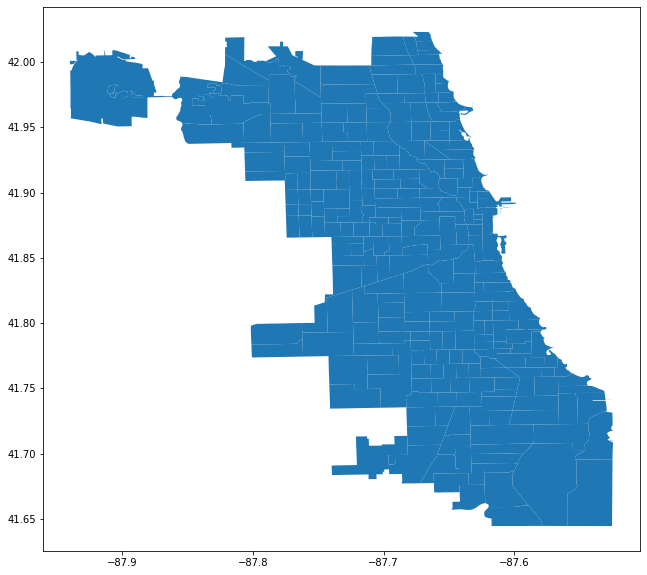

In [8]:
# Basic plot of police beats in Chicago
beats.plot()

In [9]:
crashes_beats = crashes.drop(['CRASH_DATE_EST_I', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
                              'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
                              'LANE_CNT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 
                              'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
                              'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'PHOTOS_TAKEN_I',
                              'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
                              'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ALIGNMENT'],
                            axis = 1)

In [10]:
weather

,dt_iso,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,...,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_main,weather_description
0,2013-03-03 00:00:00 +0000 UTC,Chicago,41.875562,-87.624421,27.43,15.67,24.80,30.20,1022.9,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Clouds,scattered clouds
1,2013-03-03 01:00:00 +0000 UTC,Chicago,41.875562,-87.624421,26.40,13.66,23.00,30.99,1021.3,57,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,75,Clouds,broken clouds
2,2013-03-03 02:00:00 +0000 UTC,Chicago,41.875562,-87.624421,24.91,12.13,21.20,30.20,1021.7,59,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,75,Clouds,broken clouds
3,2013-03-03 03:00:00 +0000 UTC,Chicago,41.875562,-87.624421,23.47,12.02,19.40,28.40,1023.8,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2013-03-03 04:00:00 +0000 UTC,Chicago,41.875562,-87.624421,22.23,13.37,19.04,28.40,1021.7,67,...,NaN,0.00,NaN,NaN,NaN,NaN,NaN,20,Clouds,few clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63854,2020-01-17 22:00:00 +0000 UTC,Chicago,41.875562,-87.624421,26.94,15.64,24.80,28.99,1033.0,79,...,NaN,0.25,NaN,NaN,NaN,NaN,NaN,90,Rain,light rain
63855,2020-01-17 22:00:00 +0000 UTC,Chicago,41.875562,-87.624421,26.94,15.64,24.80,28.99,1033.0,79,...,NaN,0.25,NaN,NaN,NaN,NaN,NaN,90,Snow,light snow
63856,2020-01-17 23:00:00 +0000 UTC,Chicago,41.875562,-87.624421,25.79,14.38,24.01,27.00,1031.0,79,...,NaN,0.25,NaN,NaN,NaN,NaN,NaN,90,Rain,light rain
63857,2020-01-17 23:00:00 +0000 UTC,Chicago,41.875562,-87.624421,25.79,14.38,24.01,27.00,1031.0,79,...,NaN,0.25,NaN,NaN,NaN,NaN,NaN,90,Snow,snow


In [11]:
crashes_beats_sorted = crashes_beats.set_index(['CRASH_DATE', 'BEAT_OF_OCCURRENCE'])
crashes_beats_sorted = crashes_beats_sorted.sort_index()

In [13]:
# Police Officer Shift Intervals. 1 starts at 6AM, 2 starts at 2PM, and 3 starts at 10PM.
shifts = dict.fromkeys([22, 23, 0, 1, 2, 3, 4, 5], 3)
shifts.update(dict.fromkeys([6, 7, 8, 9, 10, 11, 12, 13], 1))
shifts.update(dict.fromkeys([14, 15, 16, 17, 18, 19, 20, 21], 2))

# create shifts column in data frame.
crashes_beats_sorted['SHIFT'] = crashes_beats_sorted['CRASH_HOUR'].map(shifts)

In [14]:
# Now we need to resample from the time series to bring our crash data in-line with our weather data
aggregations = dict.fromkeys(['NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
                              'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                              'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'], np.sum)
aggregations.update({'HIT_AND_RUN_I': 'count', 'RD_NO': 'size'})

crashes_beats_downsampled = crashes_beats_sorted.groupby([pd.Grouper(freq='H', level=0),'SHIFT', 'BEAT_OF_OCCURRENCE']).agg(aggregations)

In [15]:
#merge weather and downsampled crashes dataframe
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'],format="%Y-%m-%d %H:00:00 +0000 UTC")

# merge data farmes together while maintaining the indexes
crashes_new = crashes_beats_downsampled.reset_index().merge(weather, how="left",
                                              left_on='CRASH_DATE', right_on='dt_iso')

# give column names consistent casing
crashes_new.columns = map(str.upper, crashes_new.columns)
crashes_new = crashes_new.rename(columns={'RD_NO':'NUM_ACCIDENTS'})
crashes_new = crashes_new.sort_index()

In [16]:
crashes_new

NUM_UNITS  INJURIES_TOTAL  \
CRASH_DATE          BEAT_OF_OCCURRENCE SHIFT                              
2013-03-03 16:00:00 1712.0             2            2.0             2.0   
2014-01-18 18:00:00 121.0              2            2.0             0.0   
2014-01-21 07:00:00 334.0              1            2.0             1.0   
                                       1            2.0             1.0   
2014-02-24 19:00:00 1222.0             2            2.0             0.0   
...                                                 ...             ...   
2020-01-16 23:00:00 1225.0             3            2.0             0.0   
                    1924.0             3            4.0             0.0   
                    2521.0             3            2.0             1.0   
2020-01-17 00:00:00 812.0              3            2.0             0.0   
                    1424.0             3            1.0             0.0   

                                              INJURIES_FATAL  \
CRASH_DATE          BEAT_OF_OCCURRENCE SHIFT                   
2013-03-03 16:00:00 1712.0             2                 0.0   
2014-01-18 18:00:00 121.0              2                 0.0   
2014-01-21 07:00:00 334.0              1                 0.0   
                                       1                 0.0   
2014-02-24 19:00:00 1222.0             2                 0.0   
...                                                      ...   
2020-01-16 23:00:00 1225.0             3                 0.0   
                    1924.0             3                 0.0   
                    2521.0             3                 0.0   
2020-01-17 00:00:00 812.0              3                 0.0   
                    1424.0             3                 0.0   

                                              INJURIES_INCAPACITATING  \
CRASH_DATE          BEAT_OF_OCCURRENCE SHIFT                            
2013-03-03 16:00:00 1712.0             2                          0.0   
2014-01-18 18:00:00 121.0              2                          0.0   
2014-01-21 07:00:00 334.0              1                          0.0   
                                       1                          0.0   
2014-02-24 19:00:00 1222.0             2                          0.0   
...                                                               ...   
2020-01-16 23:00:00 1225.0             3                          0.0   
                    1924.0             3                          0.0   
                    2521.0             3                          0.0   
2020-01-17 00:00:00 812.0              3                          0.0   
                    1424.0             3                          0.0   

                                              INJURIES_NON_INCAPACITATING  \
CRASH_DATE          BEAT_OF_OCCURRENCE SHIFT                                
2013-03-03 16:00:00 1712.0             2                              0.0   
2014-01-18 18:00:00 121.0              2                              0.0   
2014-01-21 07:00:00 334.0              1                              1.0   
                                       1                              1.0   
2014-02-24 19:00:00 1222.0             2                              0.0   
...                                                                   ...   
2020-01-16 23:00:00 1225.0             3                              0.0   
                    1924.0             3                              0.0   
                    2521.0             3                              1.0   
2020-01-17 00:00:00 812.0              3                              0.0   
                    1424.0             3                              0.0   

                                              INJURIES_REPORTED_NOT_EVIDENT  \
CRASH_DATE          BEAT_OF_OCCURRENCE SHIFT                                  
2013-03-03 16:00:00 1712.0             2                                2.0   
2014-01-18 18:00:00 121.0              2        